# Introduction: 
### Recommendation Engine:

A recommendation engine (or recommendation system) is a type of information filtering system designed to predict and present items (movies, books, products, etc.) that a user may be interested in. Recommendation engines are widely used in various domains, from e-commerce websites like Amazon to streaming services like Netflix. Key characteristics include:

Personalization: Tailoring recommendations to individual user preferences.

Below are various recommendation
1. Content based recommendation : recommends movie to a user based on content of movies that are watched before. Eg Super hero movies
2. Popularity based recommendation : recommends movies or series very popular . Eg Top 10 movies 
3. Collaborative recommendation : groups people based on their watching patterns previous data collected from other individual. Eg New user watched couple of movies that the groups watched, so recommends other movies that the groups watched to the new user

In this project we will incorporate content based and popularity based recommendations

#### Workflow :
Below is the sequence of the steps we follow in the workflow
1. Data - director, genre, description 
2. Data Preprocessing - Cleaning the data - missing , dedup 
3. Feature extraction - Convert textual data to numerical (feature) values which we use to find similarity confidence score.  
4. User Input of favorite movie 
5. Cosine Similarity - Similarity between vectors 
6. Display the similar movies based on user input which user may like.


## Importing the dependencies

In [67]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


## Data Collection and Pre-Processing

In [69]:
#loading the data from the csv file to a pandas dataframe
movies_data = pd.read_csv('./movies.csv')

In [70]:
# print the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [126]:
movies_data.columns.tolist()

['index',
 'budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'crew',
 'director']

### As part of the initial exploration, we will try to answer the following questions. 
1. Total number of rows and columns in the dataframe
2. How many nulls are there in each of the columns.
3. Distribution of movie budgets
4. Distribution of movie revenue
5. Revenue vs Budget scatter plot
6. Popularity of movies over time 
7. Most popular Movie genres
8. Movies with the Highest and Lowest Ratings
9. Number of Movies by language
10. Correlation matrix
11. Select the relevant features for recommendation and combine them & Converting the text data to feature vectors


In [71]:
#number of rows and columns in the dataframe
movies_data.shape

(4803, 24)

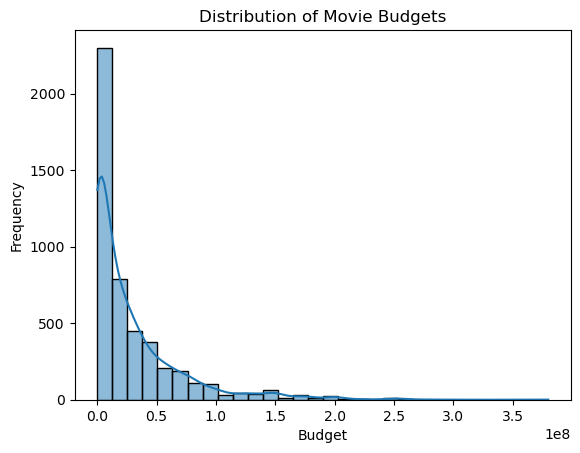

In [130]:
# Distribution of Movie Budgets
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(movies_data['budget'], kde=True, bins=30)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()


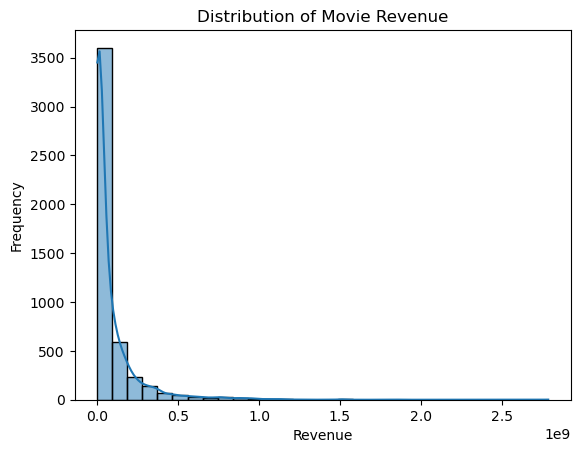

In [132]:
# Distribution of Movie Revenue
sns.histplot(movies_data['revenue'], kde=True, bins=30)
plt.title('Distribution of Movie Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


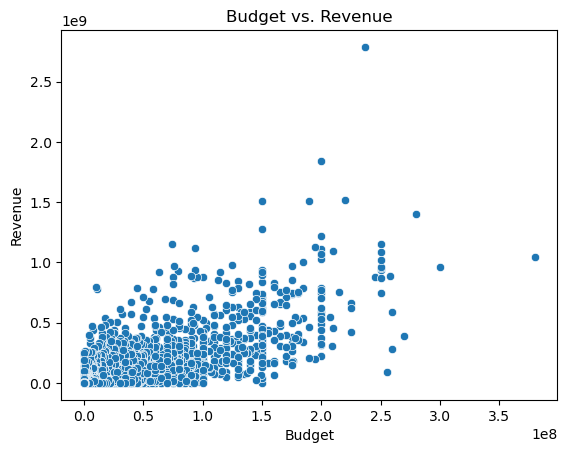

In [134]:
# Revenue vs. Budget Scatter Plot
sns.scatterplot(x='budget', y='revenue', data=movies_data)
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


C:\Users\priya\AppData\Local\Temp\ipykernel_8504\1411293172.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  movies_data['popularity'].resample('Y').mean().plot()


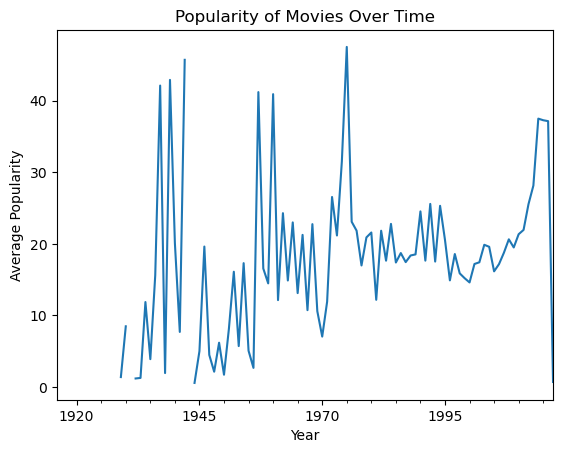

In [140]:
#Popularity of Movies over Time
movies_data['release_date'] = pd.to_datetime(movies_data['release_date'])
movies_data.set_index('release_date', inplace=True)
movies_data['popularity'].resample('Y').mean().plot()
plt.title('Popularity of Movies Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.show()


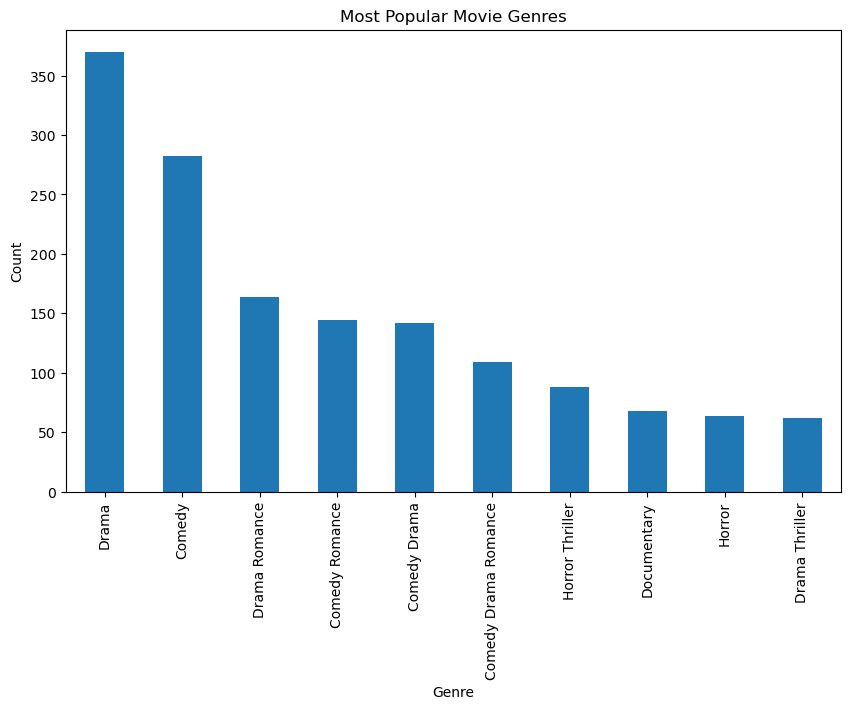

In [152]:
# Most Popular Movie Genres - top 10
genre_counts = movies_data['genres'].str.split('|', expand=True).stack().value_counts()
genre_counts.head(10).plot(kind='bar', figsize=(10,6))
plt.title('Most Popular Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


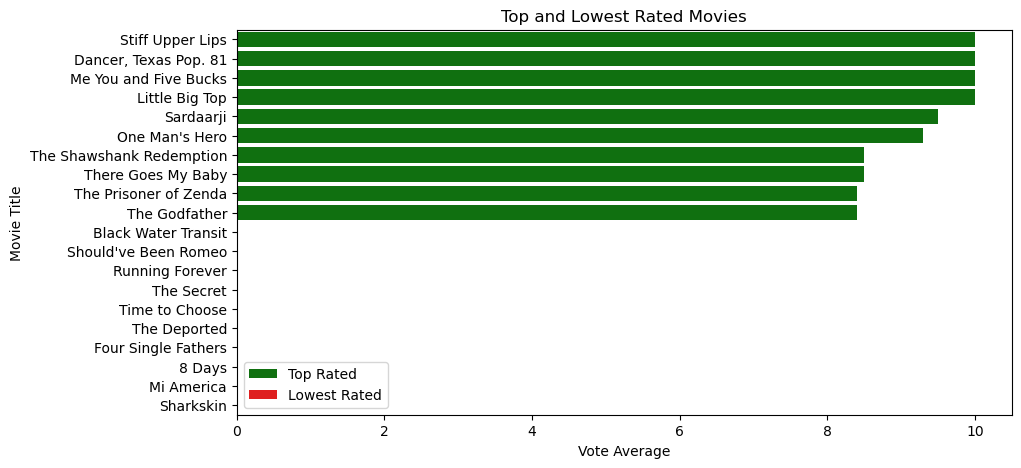

In [144]:
#Movies with the Highest and Lowest Ratings
top_rated_movies = movies_data.nlargest(10, 'vote_average')[['title', 'vote_average']]
lowest_rated_movies = movies_data.nsmallest(10, 'vote_average')[['title', 'vote_average']]

plt.figure(figsize=(10,5))
sns.barplot(x='vote_average', y='title', data=top_rated_movies, color='green', label='Top Rated')
sns.barplot(x='vote_average', y='title', data=lowest_rated_movies, color='red', label='Lowest Rated')
plt.title('Top and Lowest Rated Movies')
plt.xlabel('Vote Average')
plt.ylabel('Movie Title')
plt.legend()
plt.show()


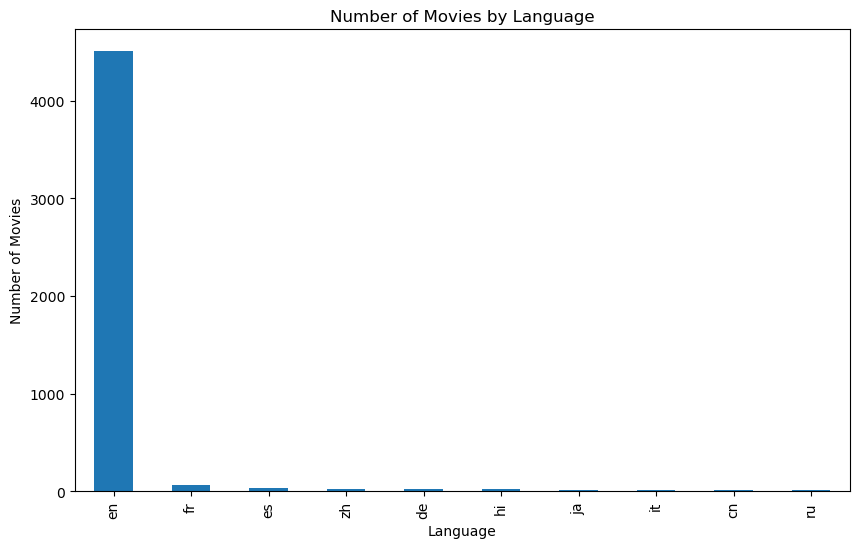

In [150]:
#Number of Movies by Language
language_counts = movies_data['original_language'].value_counts()
language_counts.head(10).plot(kind='bar', figsize=(10,6))
plt.title('Number of Movies by Language')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.show()


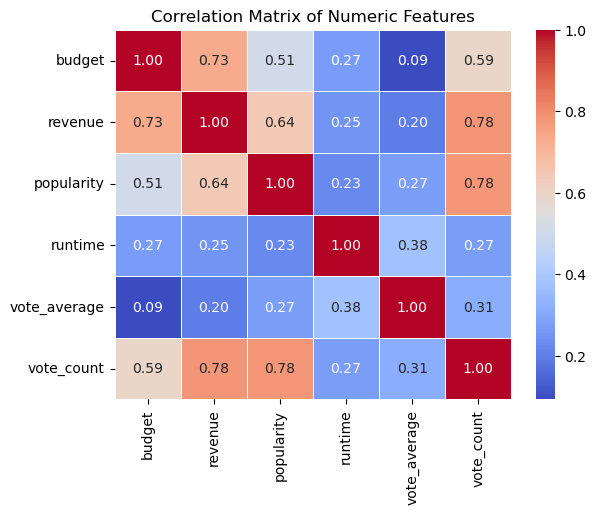

In [148]:
#  Correlation Matrix of Numeric Features
numeric_cols = ['budget', 'revenue', 'popularity', 'runtime', 'vote_average', 'vote_count']
corr = movies_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [72]:
#selecting the relevant features for recommendation
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [73]:
#replacing the null values with null string
for feature in selected_features :
    movies_data[feature] = movies_data[feature].fillna('')

In [74]:
# Combining all the 5 selected features
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [75]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [76]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()
feature_vectors = vectorizer.fit_transform(combined_features)
print(feature_vectors)

### Answers
1. The data is clean. 
2. There are no missing values to be imputed. 
3. Popularity of movies over time are between years 1975-1980 
4. Most popular Movie genres - Drama and then comedy 
5. Maximum number of movies are in English language
6. Results of Correlation matrix \
    a. Movies with higher budgets tend to generate more revenue ( Budget & Revenue 0.73) \
    b. More popular movies tend to ear more \
    c. More popular movies receive more votes \
    d. Revenue doesn't strongly influenec a movie's rating

## Movie Based Recommendation 
In movie based recommendations, the movies are recommended based on the similarity between movies. 
The steps are as follows:

Input the favorite movie name from the user
Similarity between movies would be computed using Cosine Similarity.
Find most similar movies and list 30 of them.

## Cosine Similarity

In [80]:
# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [81]:
print(similarity.shape)

(4803, 4803)


In [82]:
#getting the movie name from the user

movie_name = input(' Enter your favorite movie name: ')

 Enter your favorite movie name:  iron man


In [83]:
# creating a list with all the movie names given in the dataset
list_of_all_titles = movies_data['title'].tolist()
#print(list_of_all_titles)

In [84]:
# finding the close match for the movie name given by the user

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Iron Man', 'Iron Man 3', 'Iron Man 2']


In [85]:
close_match = find_close_match[0]
print(close_match)

Iron Man


In [86]:
# finding the index of the movie with title

index_of_the_movie = movies_data[movies_data.title == close_match]['index'].values[0]
print(index_of_the_movie)

68


In [87]:
# getting a list of similar movies

similarity_score = list(enumerate(similarity[index_of_the_movie]))
#print(similarity_score)

In [88]:
len(similarity_score)

4803

In [89]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)
#print(sorted_similar_movies)

In [90]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

recommendations = []
for i, movie in enumerate(sorted_similar_movies[1:31], start=1):
    index = movie[0]
    recommended_movie = movies_data[movies_data.index == index]['title'].values[0]
    recommendations.append(f"{i}. {recommended_movie}")
    print(recommended_movie)

Movies suggested for you : 

1 . Iron Man
2 . Iron Man 2
3 . Iron Man 3
4 . Avengers: Age of Ultron
5 . The Avengers
6 . Captain America: Civil War
7 . Captain America: The Winter Soldier
8 . Ant-Man
9 . X-Men
10 . Made
11 . X-Men: Apocalypse
12 . X2
13 . The Incredible Hulk
14 . The Helix... Loaded
15 . X-Men: First Class
16 . X-Men: Days of Future Past
17 . Captain America: The First Avenger
18 . Kick-Ass 2
19 . Guardians of the Galaxy
20 . Deadpool
21 . Thor: The Dark World
22 . G-Force
23 . X-Men: The Last Stand
24 . Duets
25 . Mortdecai
26 . The Last Airbender
27 . Southland Tales
28 . Zathura: A Space Adventure
29 . Sky Captain and the World of Tomorrow
30 . The Amazing Spider-Man 2


## Streamlit App Link : https://unsupervisedlearning-movie-recommendation-system.streamlit.app/

## Conclusion/ Future Work
1. The current movie recommendation system uses a content-based filtering technique, leveraging movie metadata like genres, plot, and other attributes. In addition, a popularity-based factor was incorporated to ensure the system suggests widely appreciated movies. While this approach performs decently, it still has room for improvement in terms of personalized recommendations.
   
2. Moving forward, a Hybrid Recommendation System could be implemented. This combines the strengths of both content-based filtering (which uses item features) and collaborative filtering (which uses user-item interactions).

3. For future improvement, deep learning based approaches can be used such as Neural Collaborative Filtering (NCF) or auto encoders which can take both user and item interactions, create an embedding and then use that as input to the recommendation system.

   